# Bottom 10 Spenders

#### Load the data and necessary libraries

In [1]:
# Load the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('../../dsi_team_22/data/raw/pharma.csv')

## Exploring Year Range: 1970 to 2016

### Bottom 10 Lowest Spending Countries (Per Capita)

This table ranks the countries by their average spending per capita in USD, starting from the lowest.

| Rank | Country Code | Country Name     | Avg Per Capita ($ USD) |
|:----:|:------------:|:----------------:|:-----------------------------------:|
| 1    | TUR          | Turkey           | 39.580364                           |
| 2    | GBR          | United Kingdom   | 131.190258                          |
| 3    | NZL          | New Zealand      | 135.572750                          |
| 4    | KOR          | South Korea      | 181.512872                          |
| 5    | DNK          | Denmark          | 198.228444                          |
| 6    | NOR          | Norway           | 201.366255                          |
| 7    | NLD          | Netherlands      | 213.506860                          |
| 8    | FIN          | Finland          | 217.517978                          |
| 9    | SWE          | Sweden           | 224.082457                          |
| 10   | EST          | Estonia          | 227.386176                          |

#### Supporting Python Code:

In [2]:
# Identify the Bottom 10 highest spending countries (Per Capita)
bottom_10_per_cap = df.groupby('LOCATION')['USD_CAP'].mean().sort_values(ascending=True).head(10)

# Display the results
print("Bottom 10 Lowest Spending Countries:")
print(bottom_10_per_cap)

Bottom 10 Lowest Spending Countries:
LOCATION
TUR     39.580364
GBR    131.190258
NZL    135.572750
KOR    181.512872
DNK    198.228444
NOR    201.366255
NLD    213.506860
FIN    217.517978
SWE    224.082457
EST    227.386176
Name: USD_CAP, dtype: float64


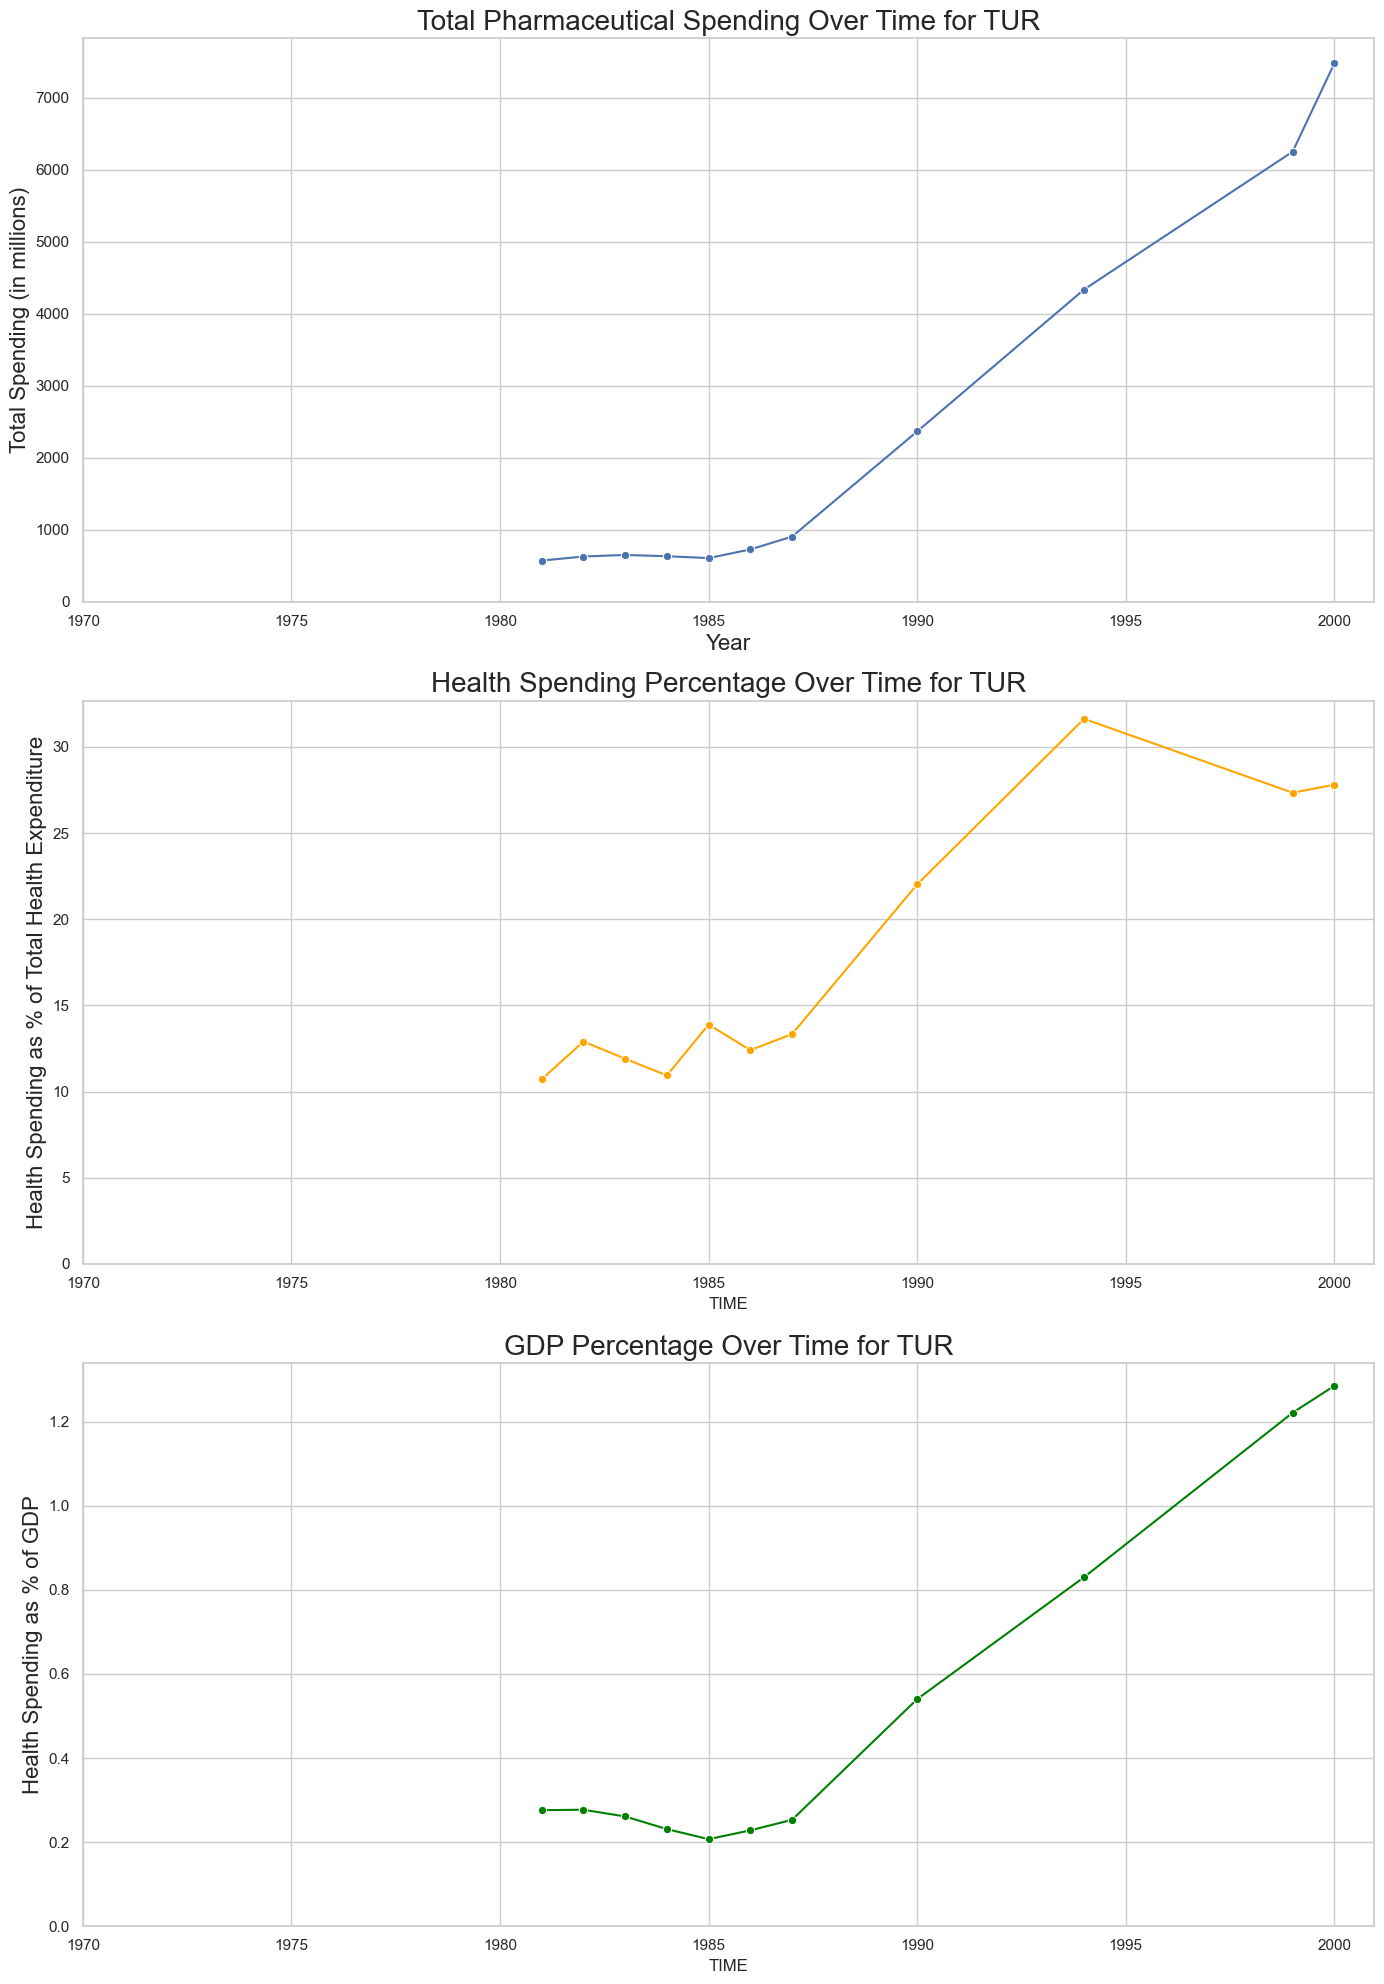

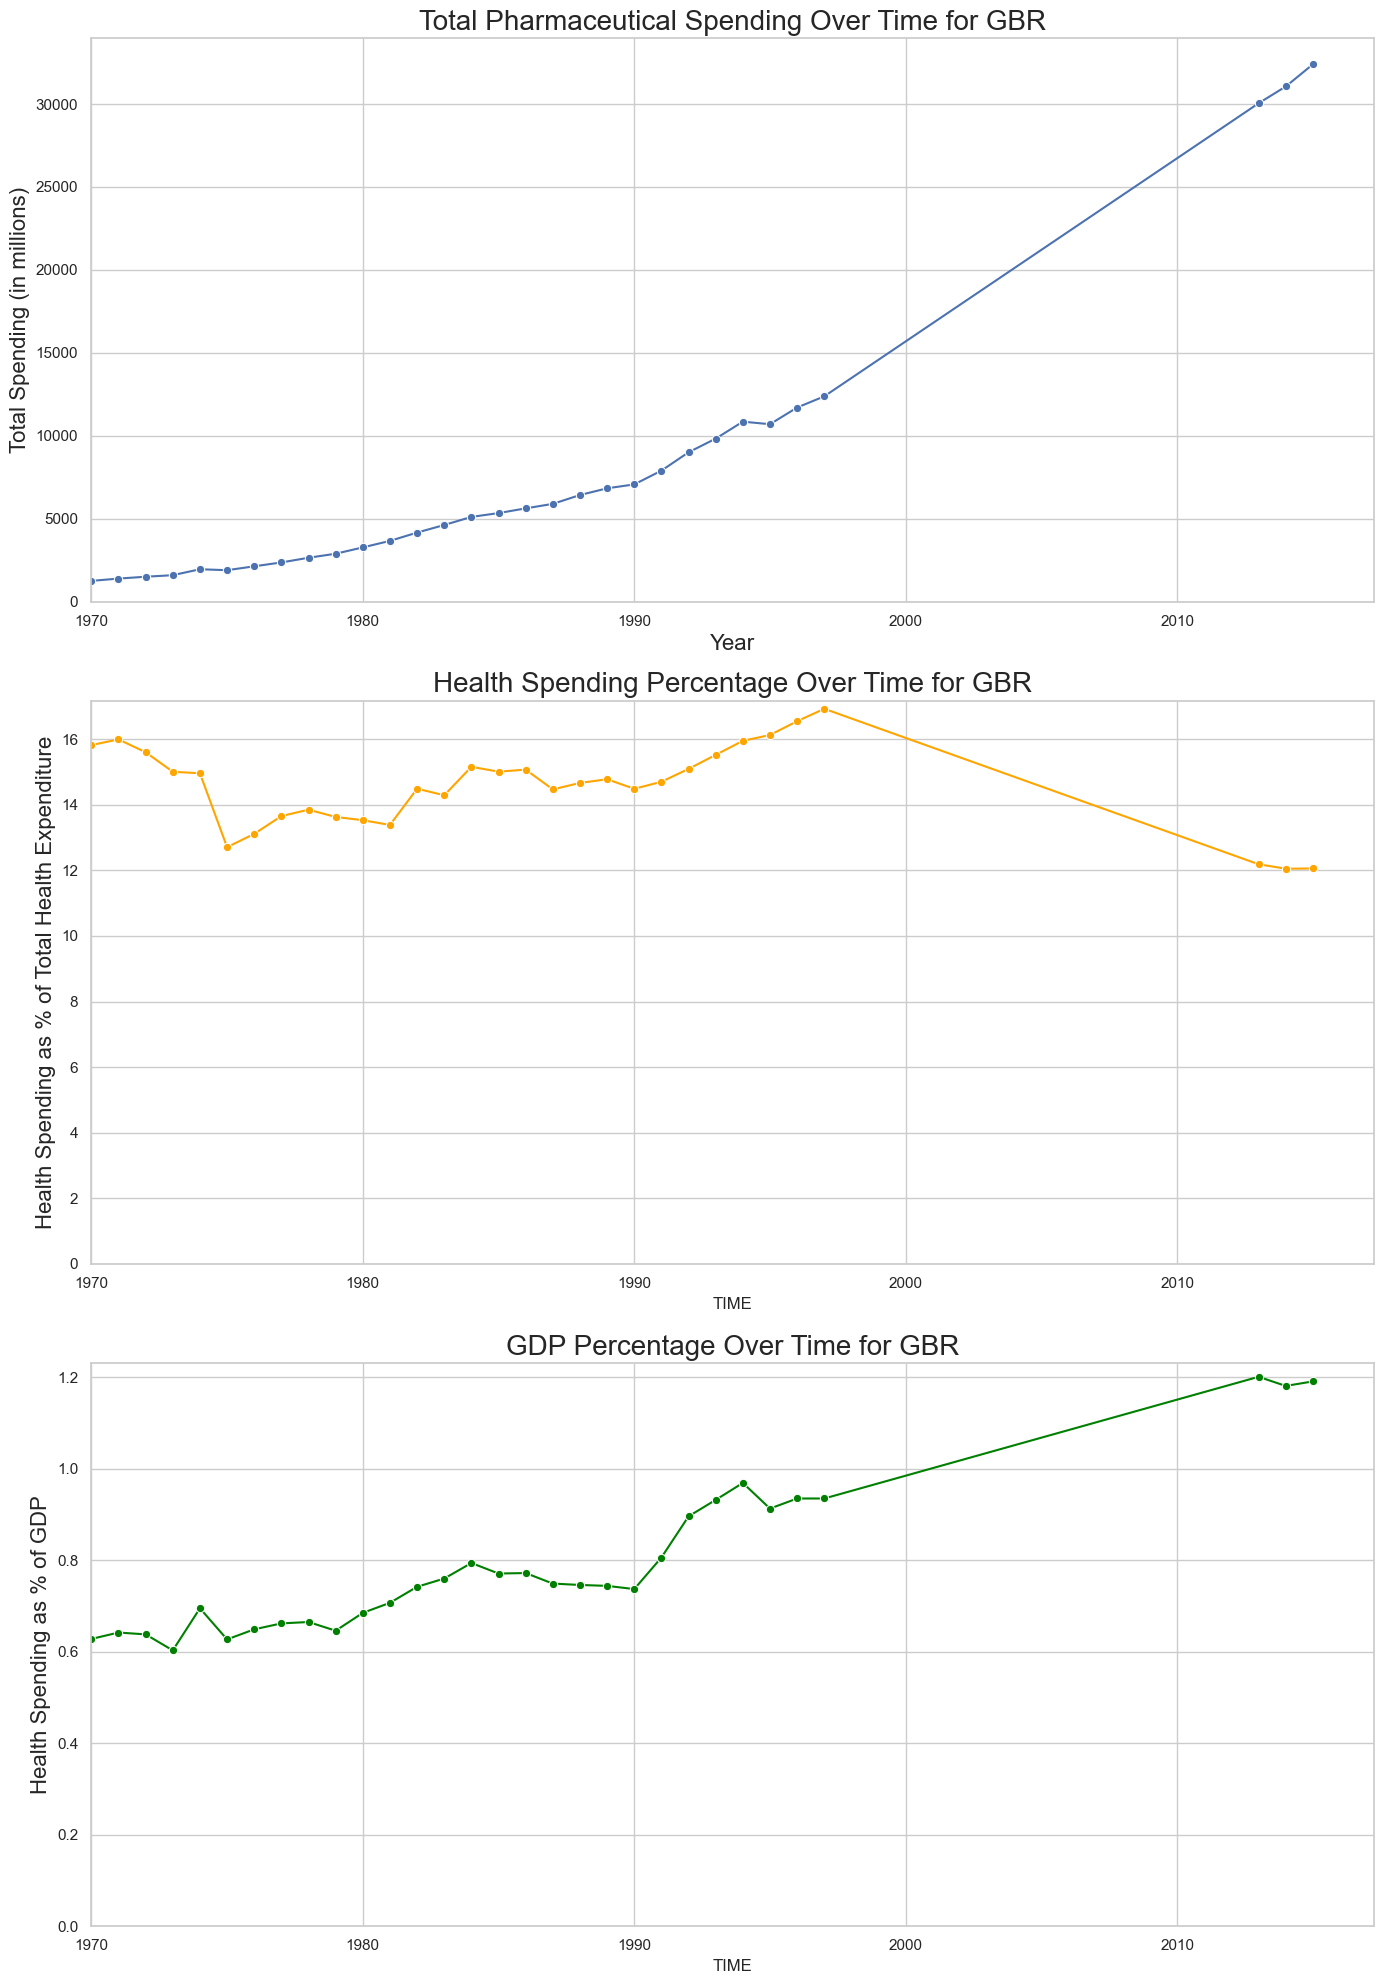

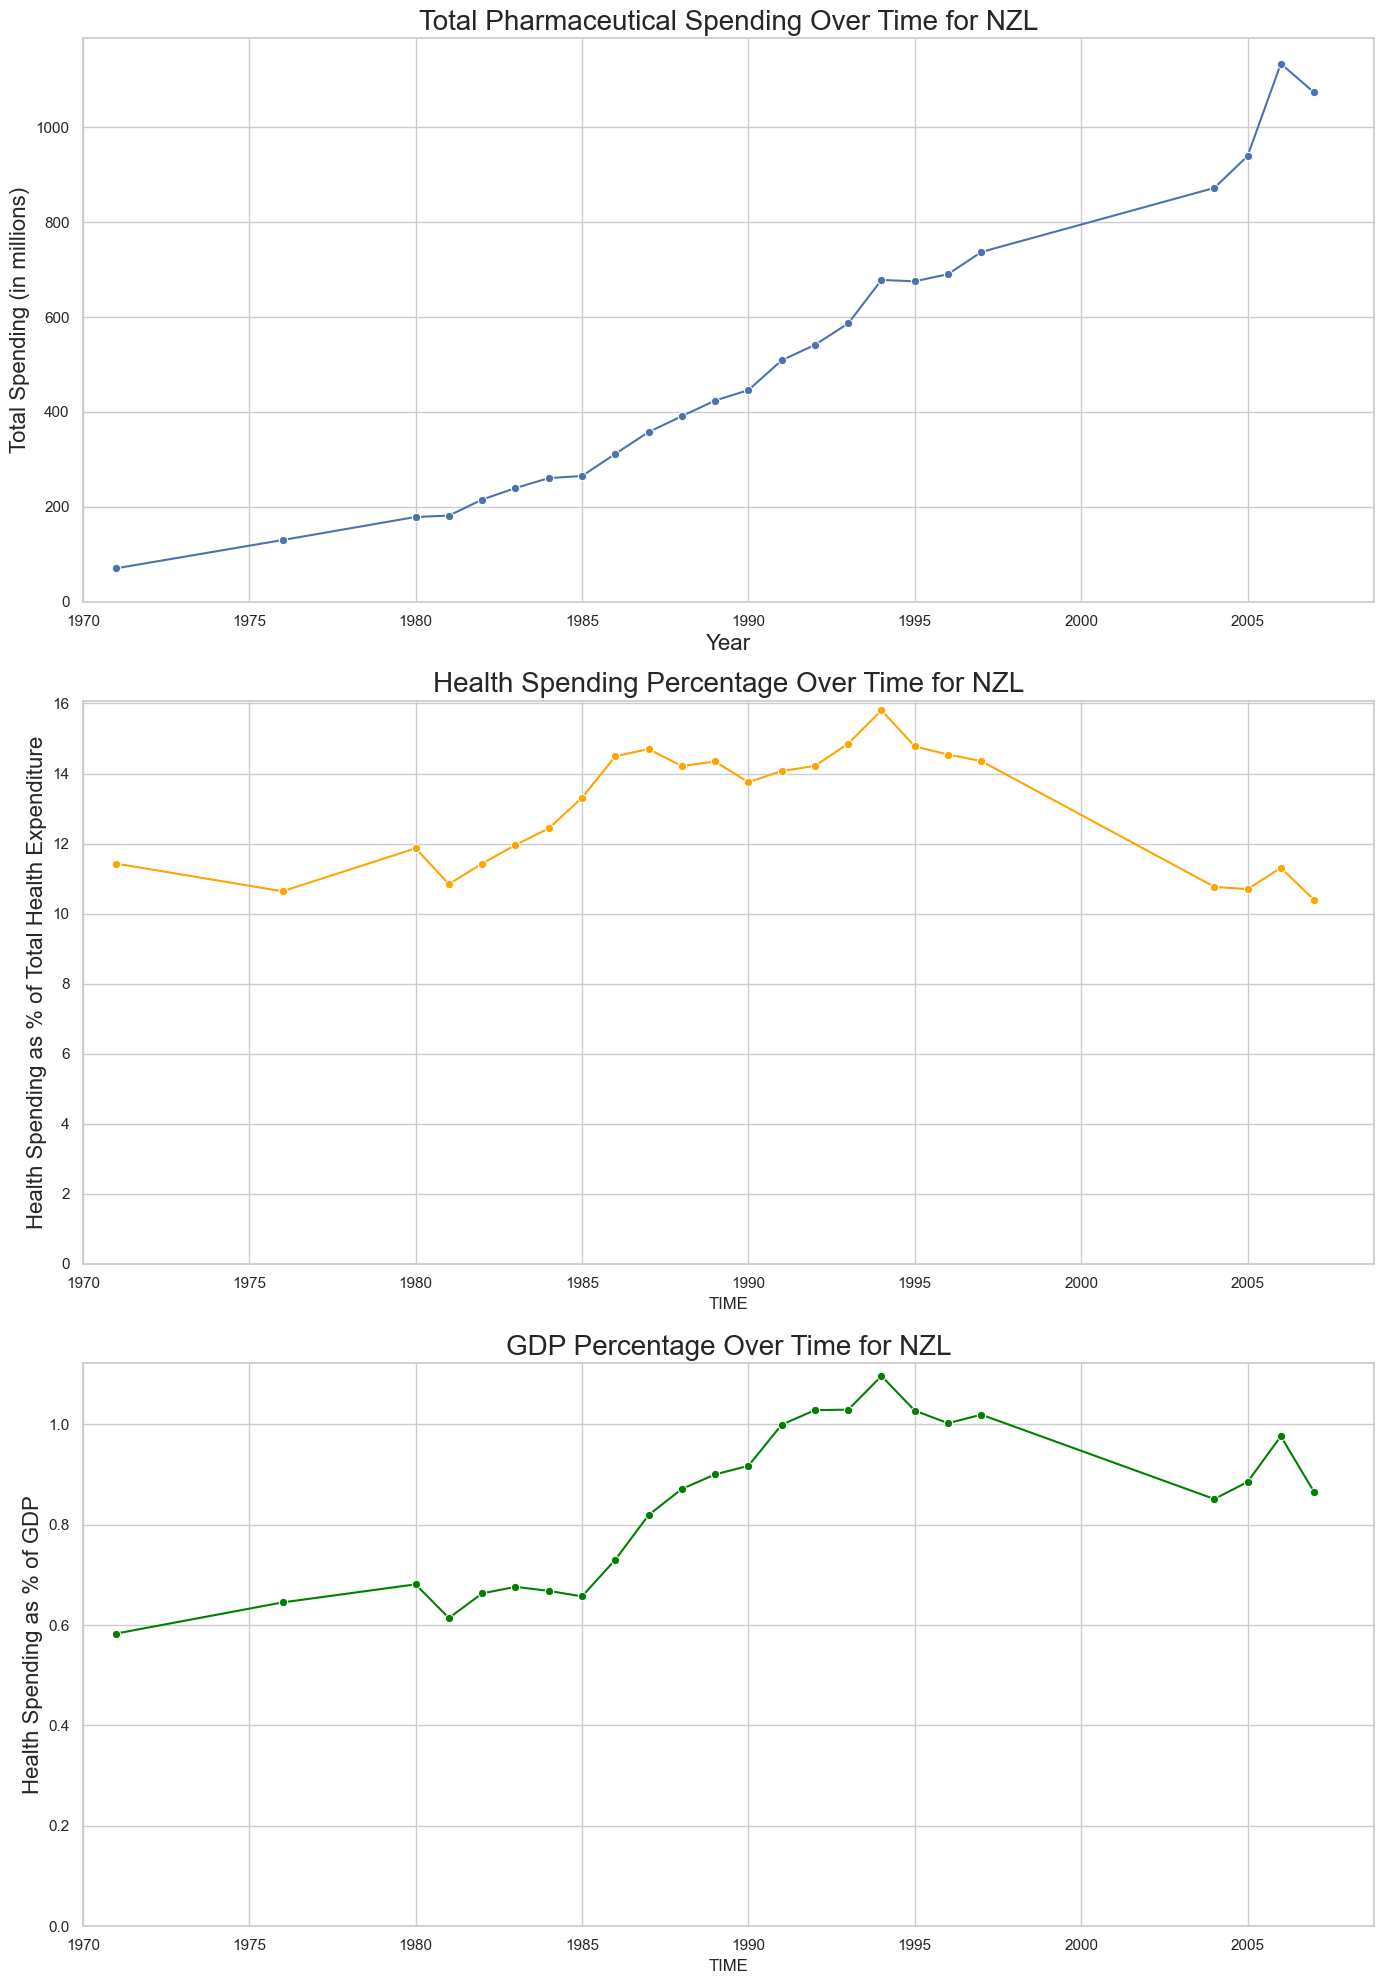

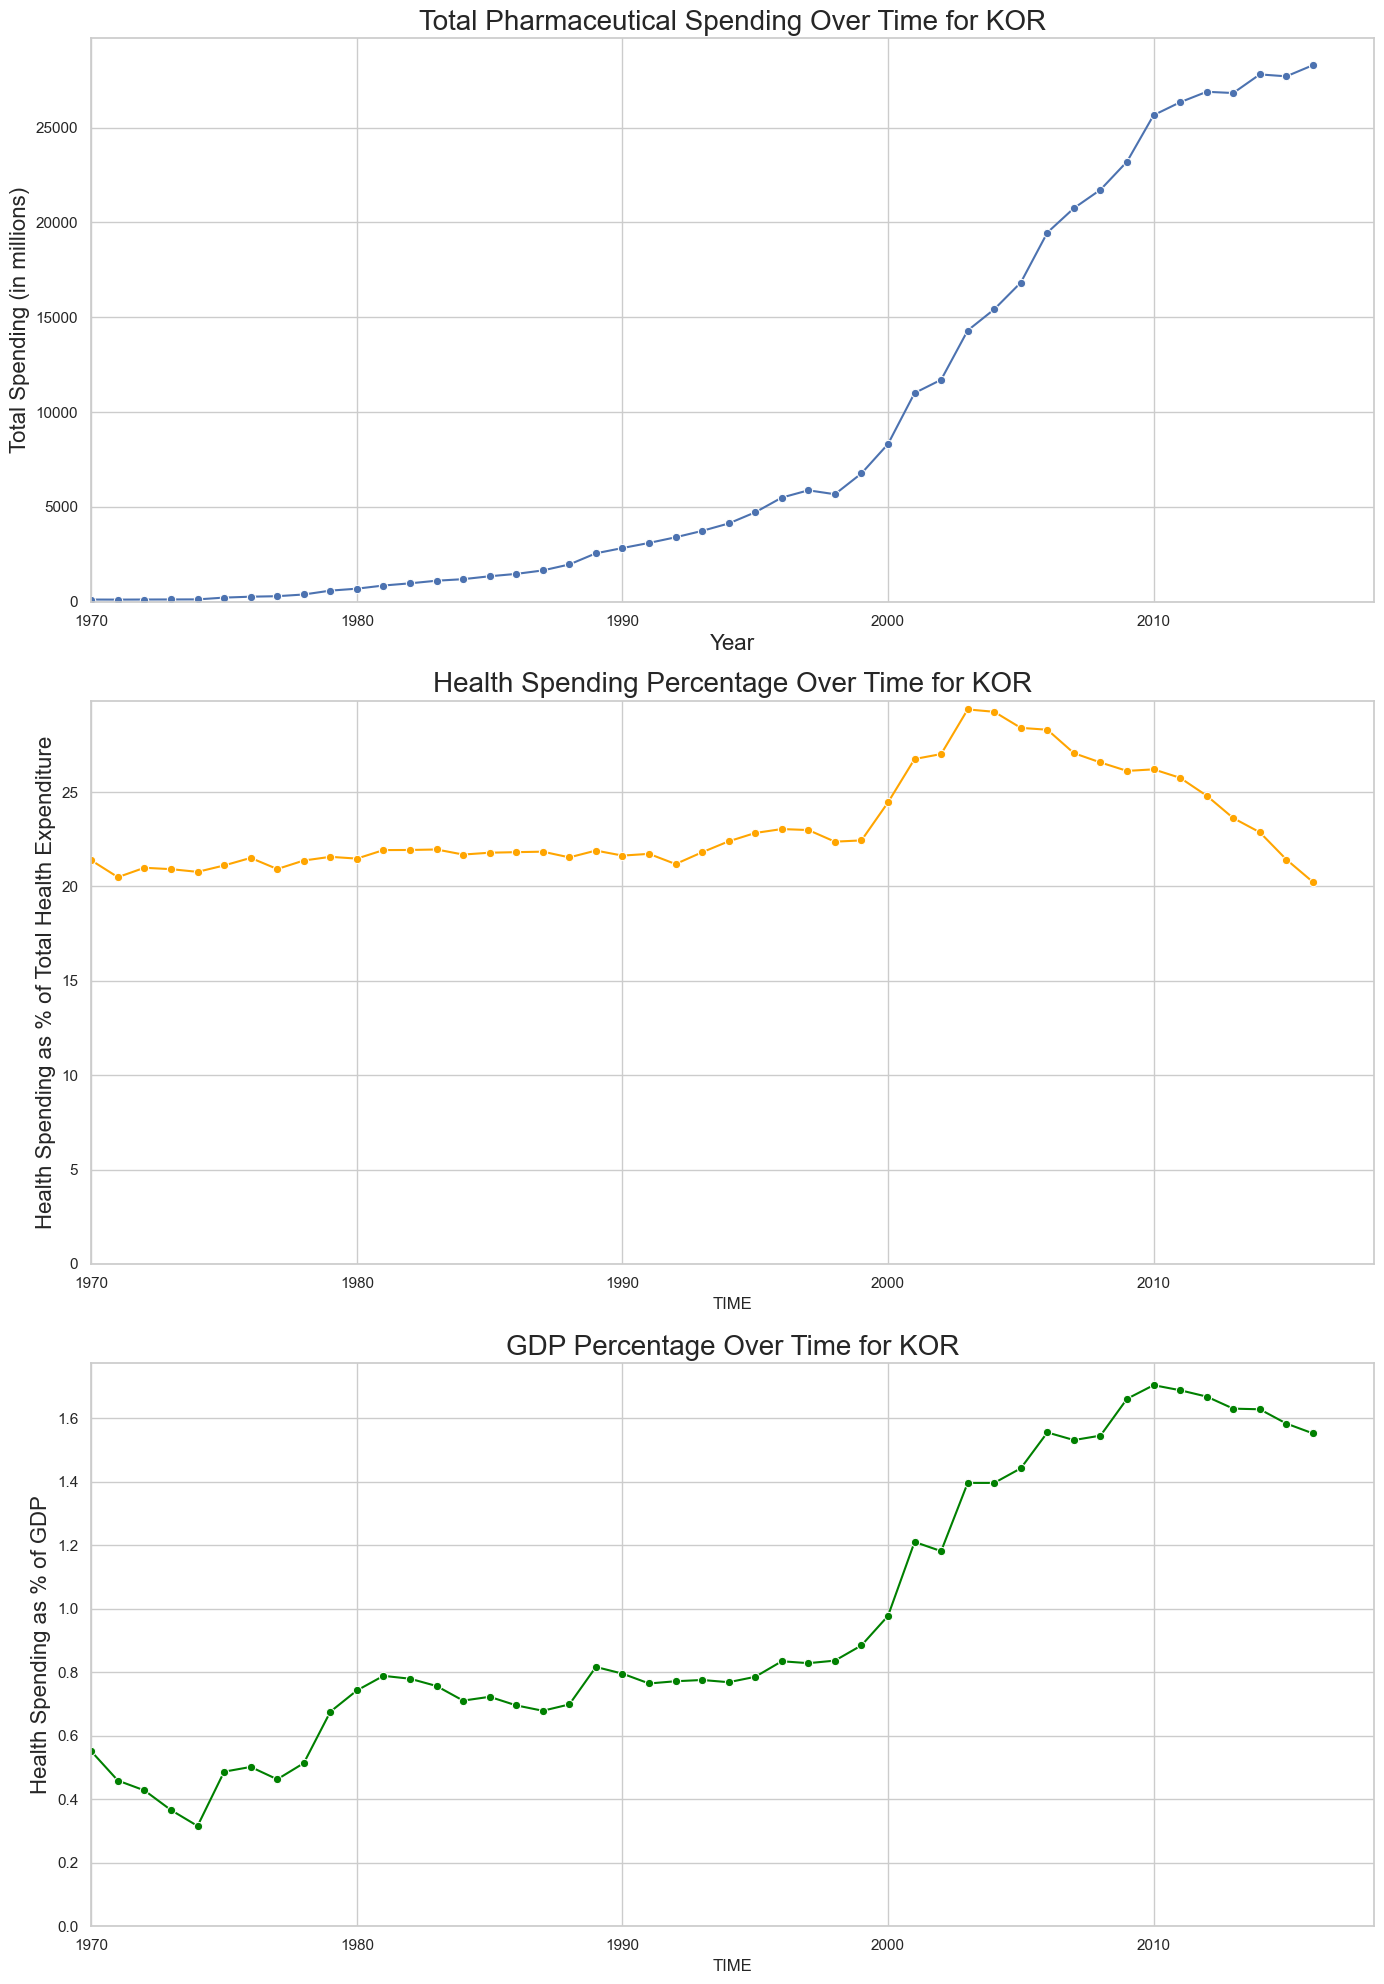

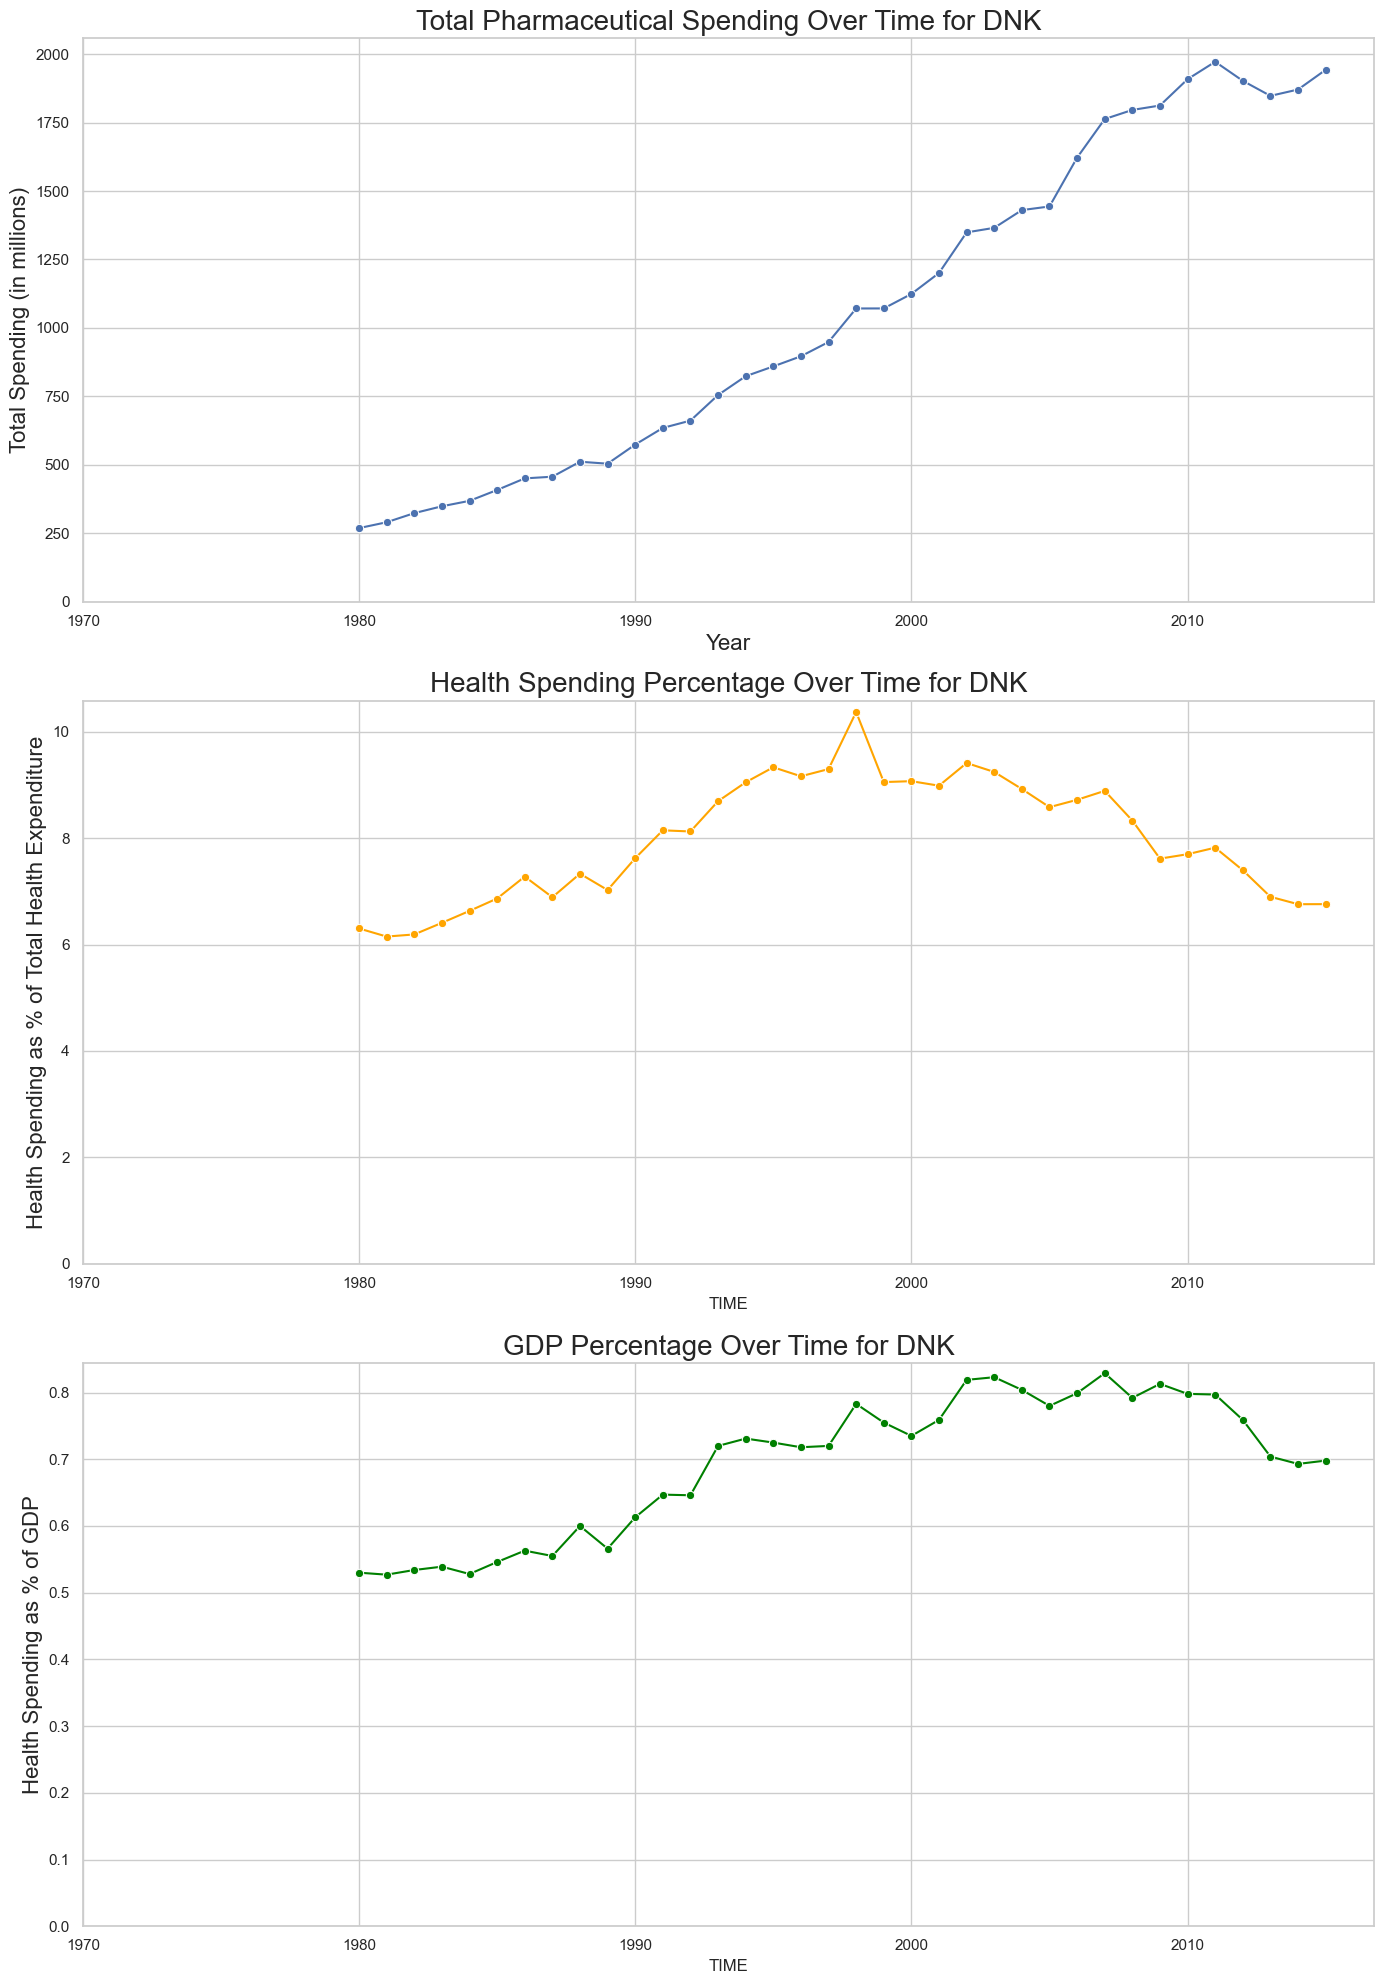

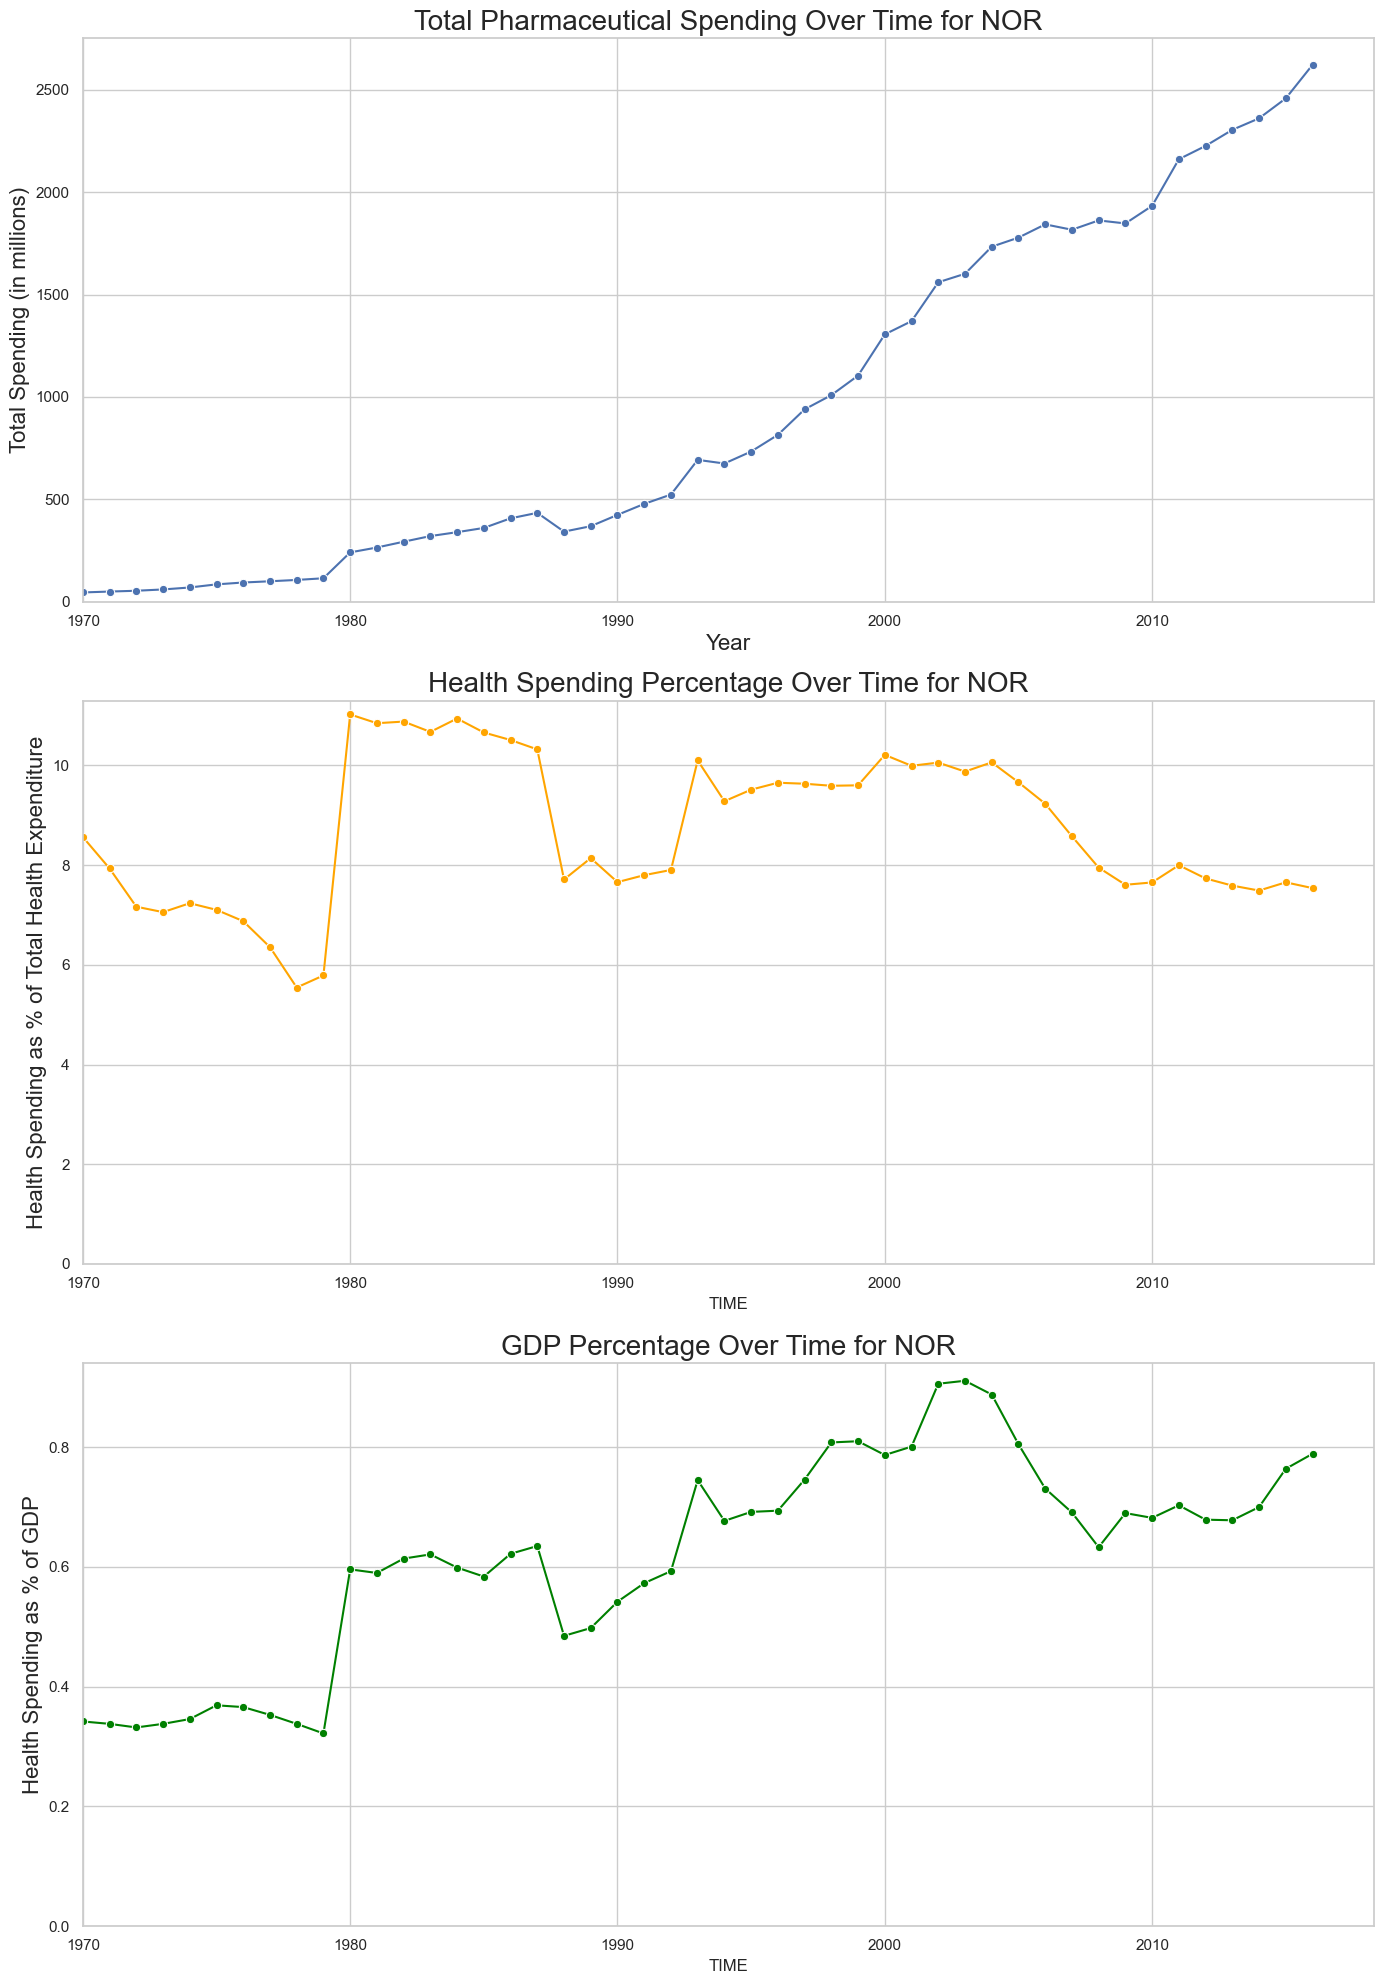

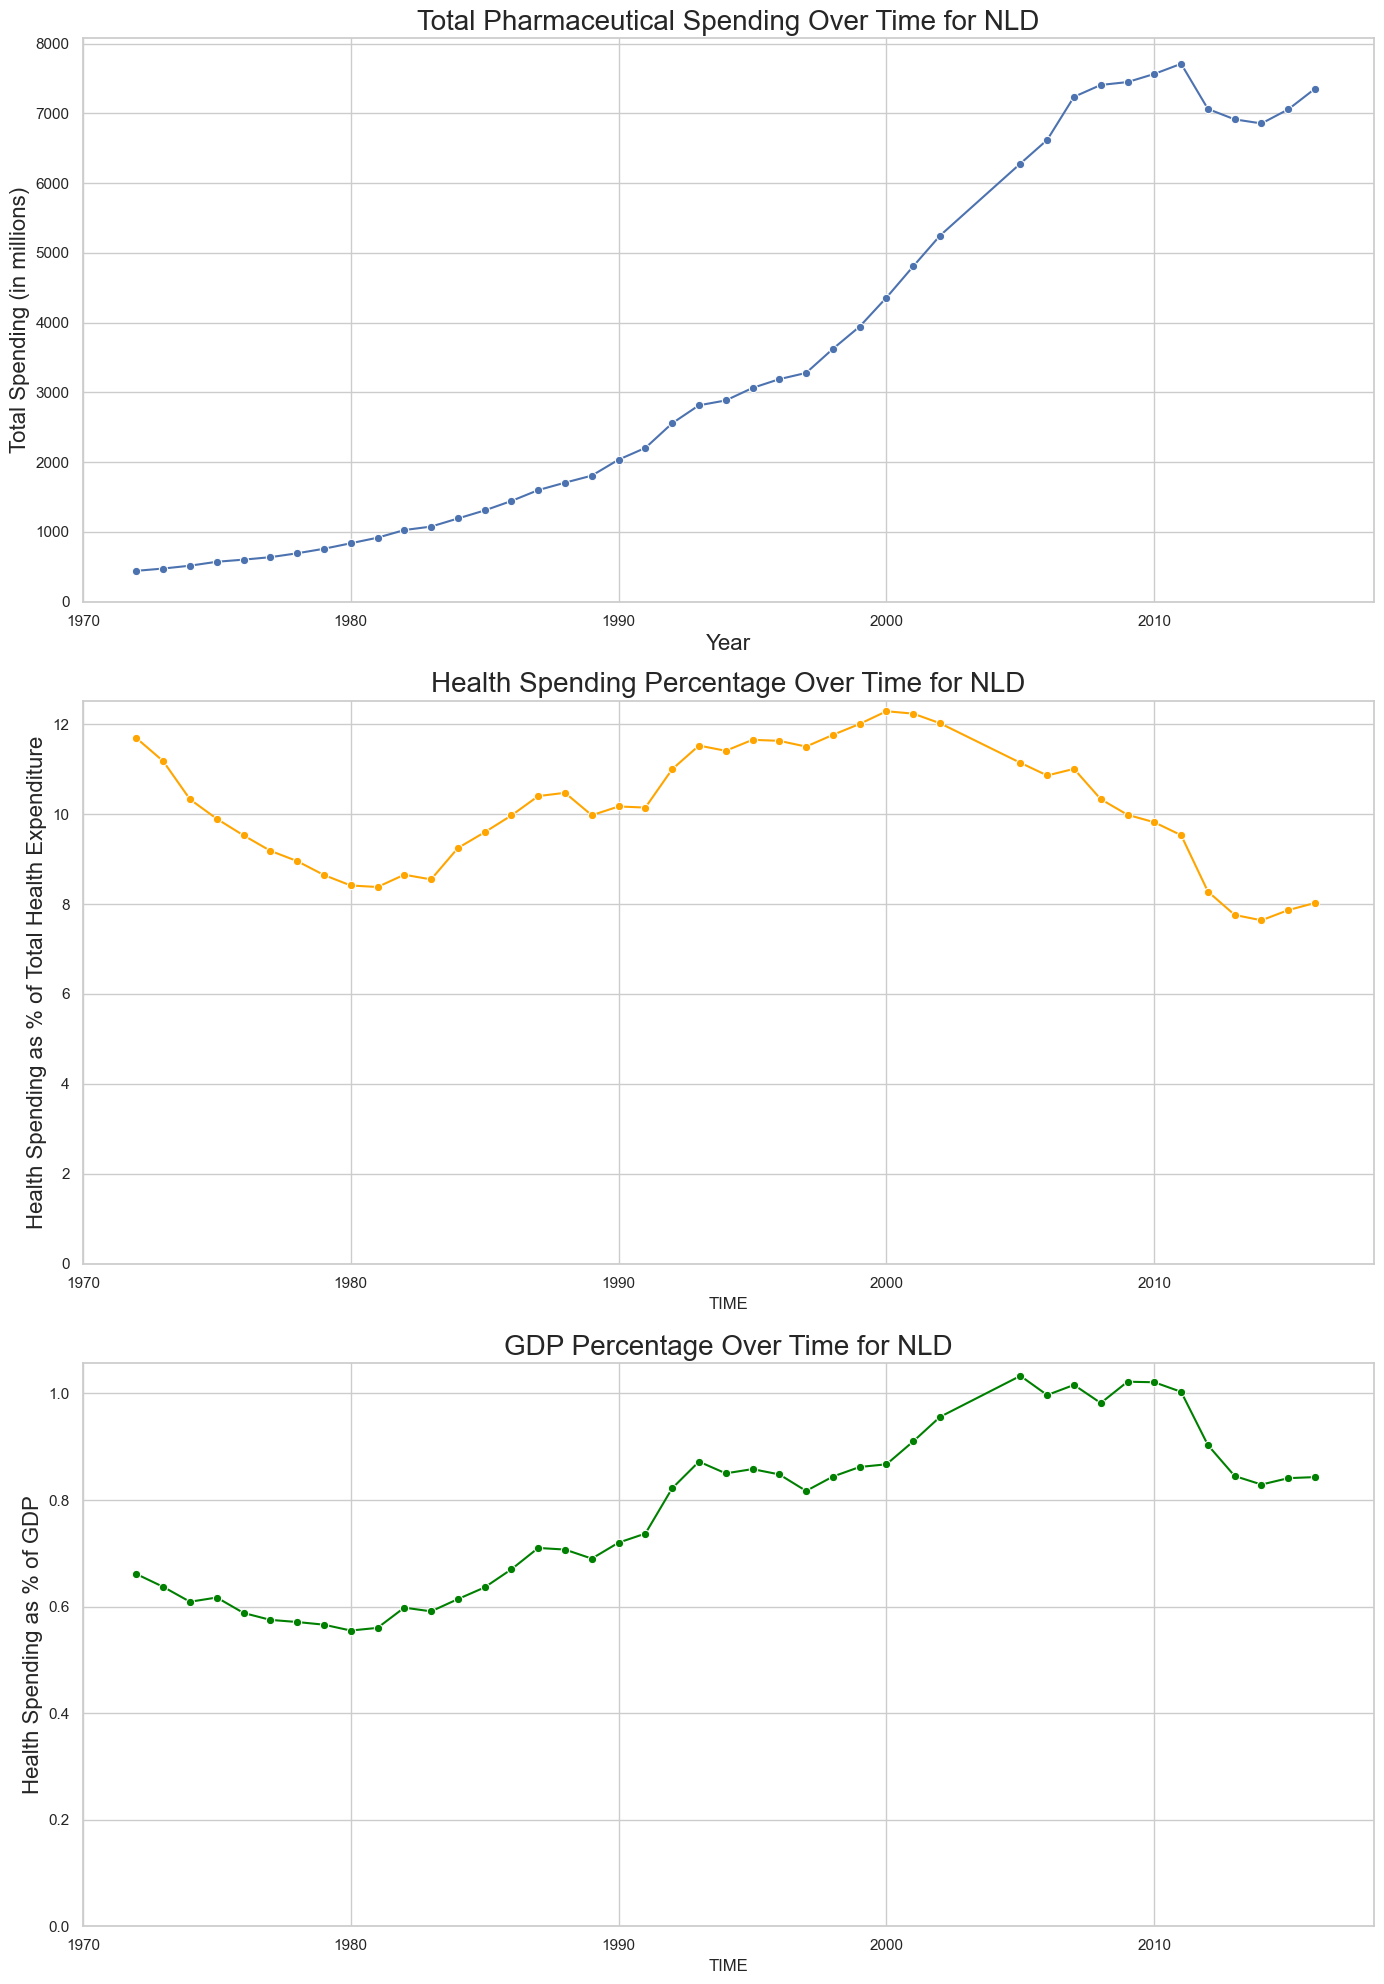

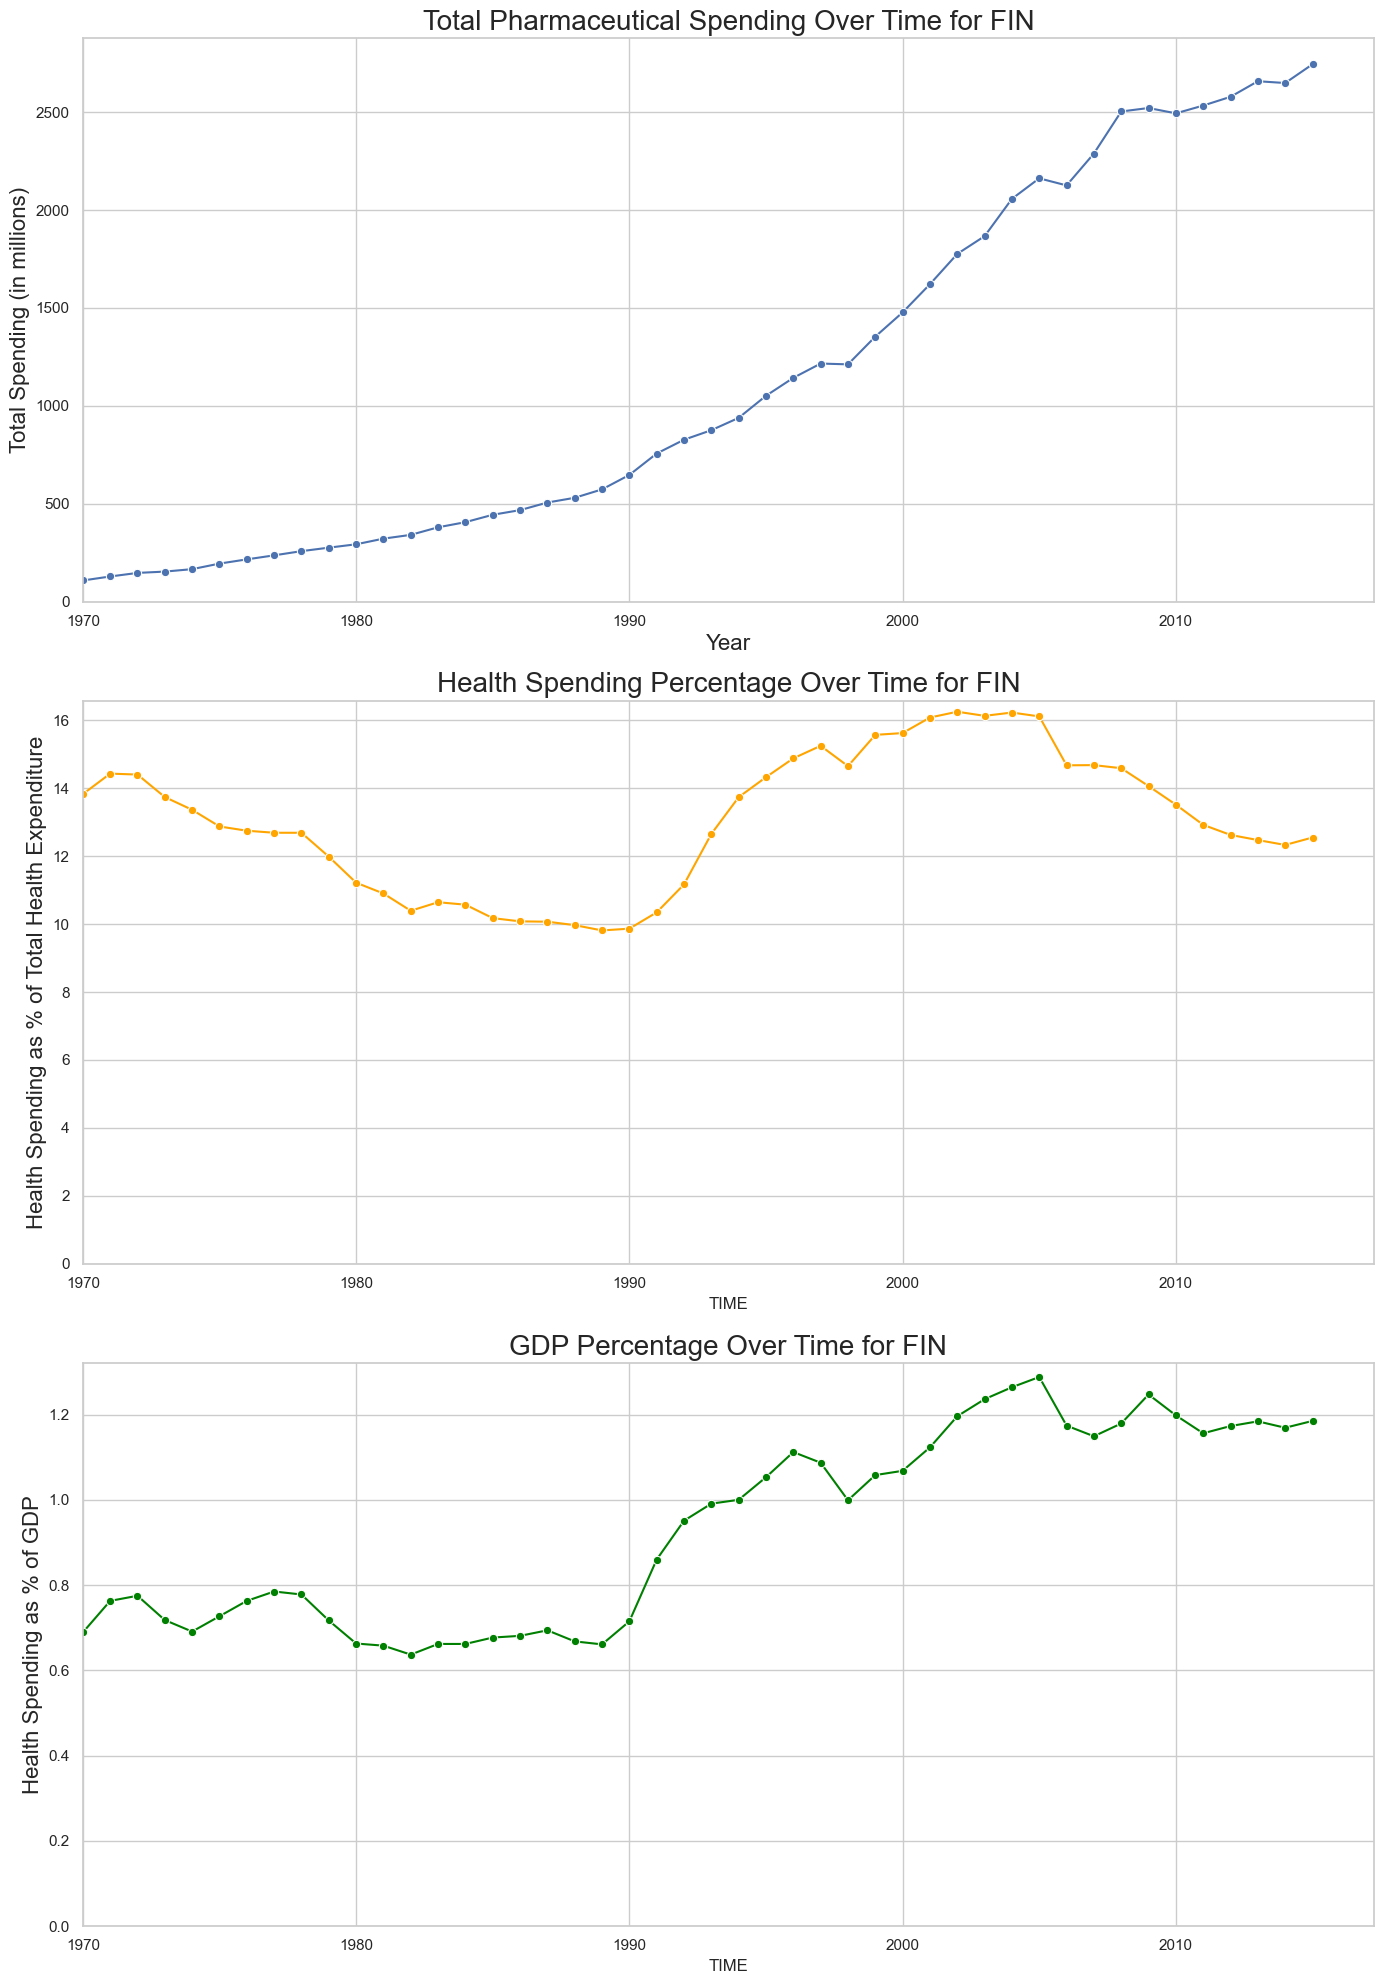

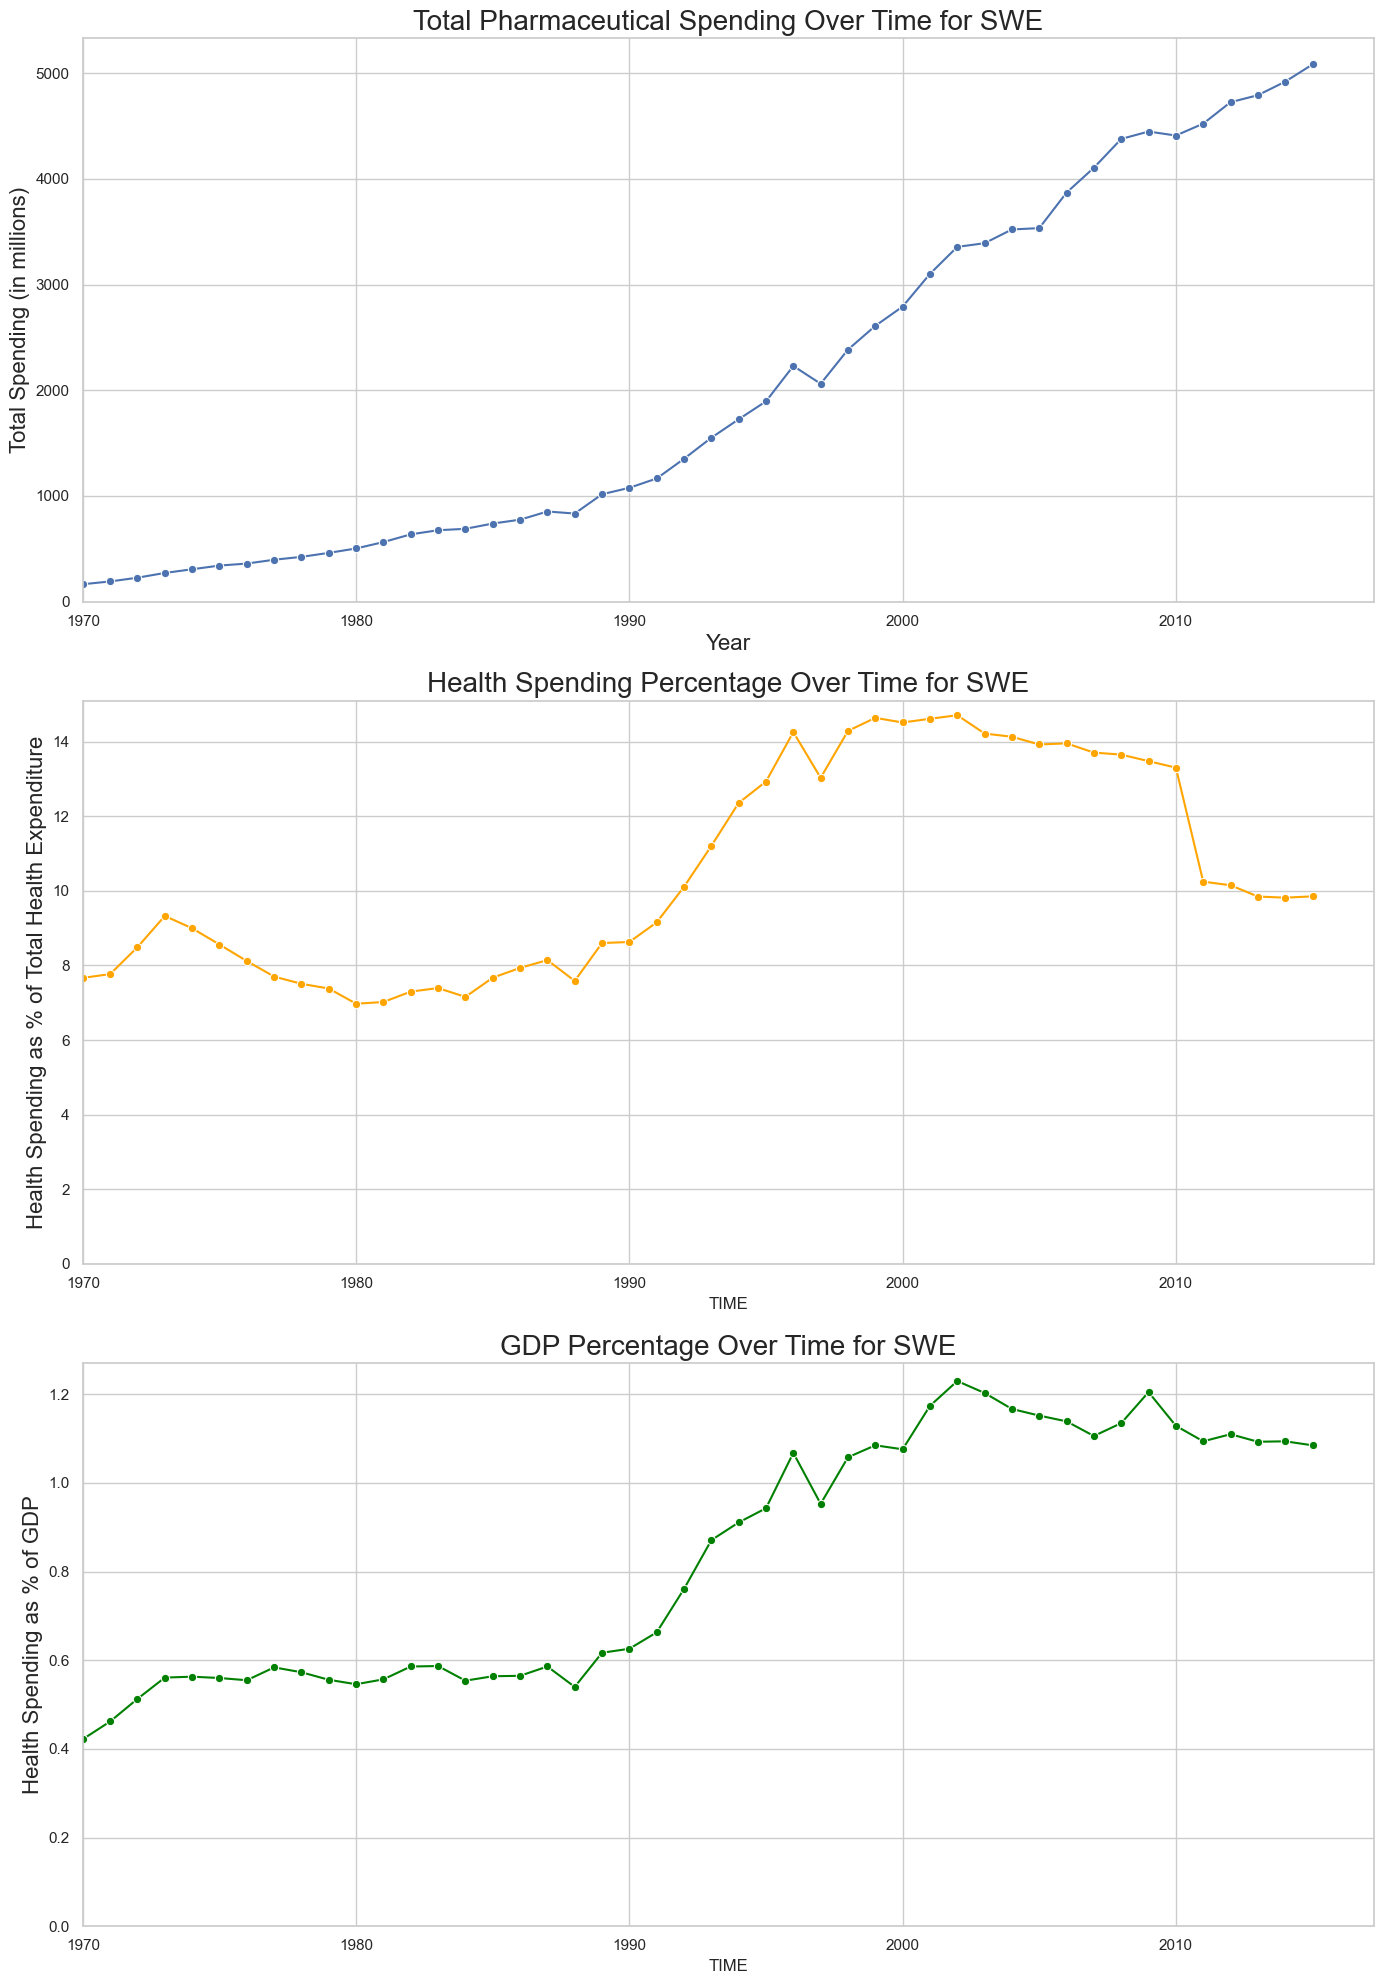

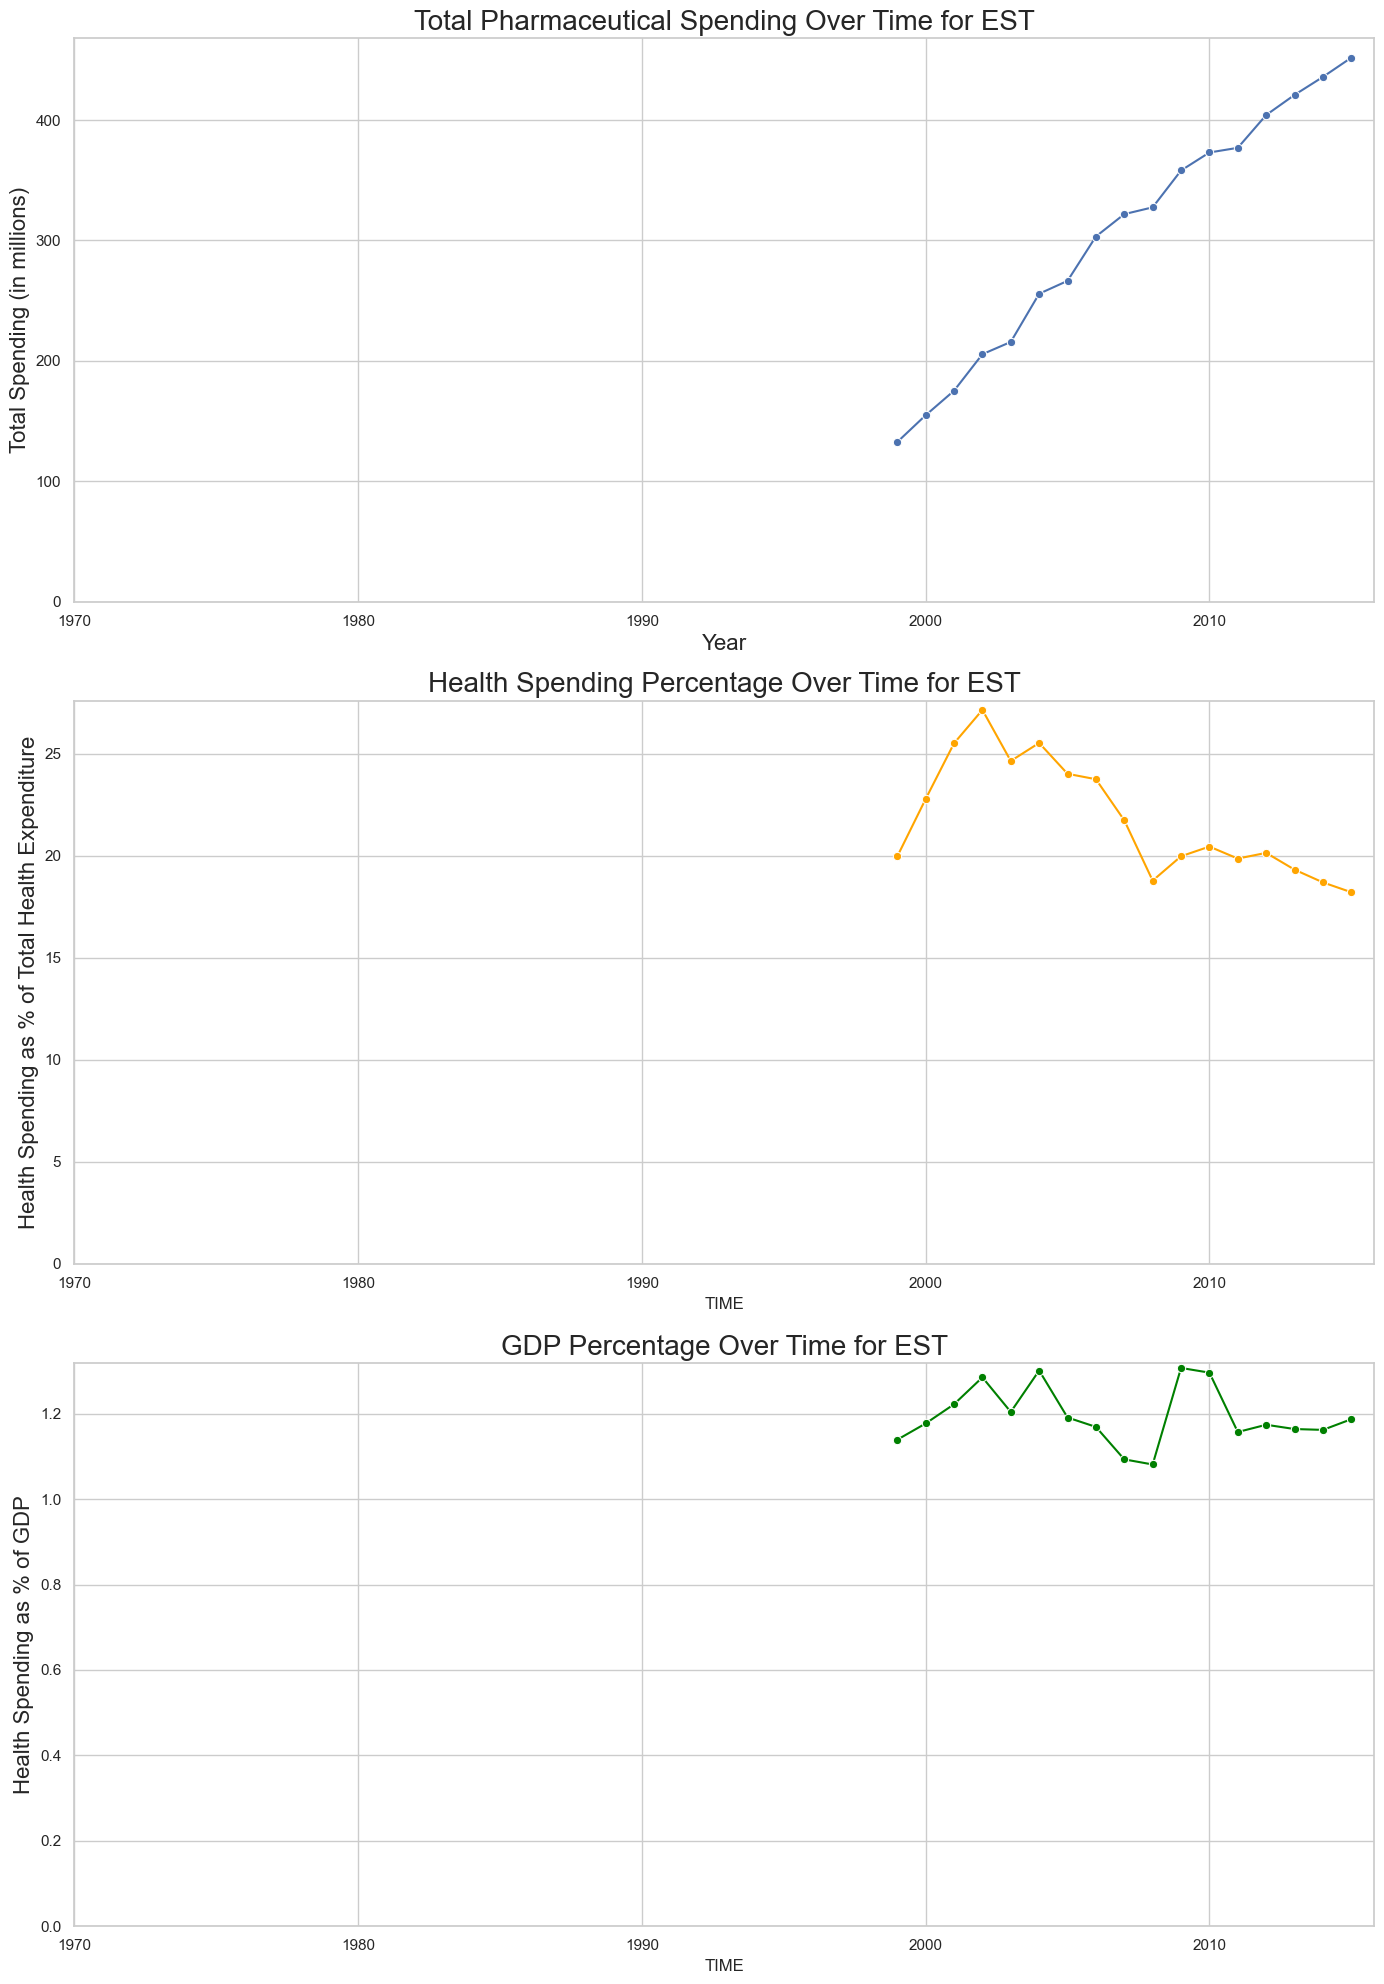

In [3]:
# Calculate the average USD_CAP per country
bottom_countries = (
    df.groupby('LOCATION')['USD_CAP'].mean()
    .sort_values(ascending=True)
    .head(10)
    .index
)

# Filter the DataFrame to include only the top 10 countries by USD_CAP
df_bottom_countries = df[df['LOCATION'].isin(bottom_countries)]

# Set the aesthetic style of the plots
sns.set(style='whitegrid')

# Define the x-axis limits
x_axis_start = 1970
y_axis_start = 0

# Loop through only the top 10 countries
for country in bottom_countries:
    country_data = df_bottom_countries[df_bottom_countries['LOCATION'] == country]
    
    plt.figure(figsize=(14, 20))
    
    # Plot Total Spending
    plt.subplot(3, 1, 1)
    sns.lineplot(data=country_data, x='TIME', y='TOTAL_SPEND', marker='o')
    plt.title(f'Total Pharmaceutical Spending Over Time for {country}', fontsize = 20)
    plt.xlabel('Year', fontsize = 16)
    plt.ylabel('Total Spending (in millions)', fontsize = 16)
    plt.xlim(left=x_axis_start)  # Set x-axis starting point to 1970
    plt.ylim(bottom=y_axis_start) 
    
    # Plot Health Expenditure Percentage
    plt.subplot(3, 1, 2)
    sns.lineplot(data=country_data, x='TIME', y='PC_HEALTHXP', marker='o', color='orange')
    plt.title(f'Health Spending Percentage Over Time for {country}', fontsize = 20)
    plt.ylabel('Health Spending as % of Total Health Expenditure', fontsize = 16)
    plt.xlim(left=x_axis_start)  # Set x-axis starting point to 1970
    plt.ylim(bottom=y_axis_start) 
    
    # Plot GDP Percentage
    plt.subplot(3, 1, 3)
    sns.lineplot(data=country_data, x='TIME', y='PC_GDP', marker='o', color='green')
    plt.title(f'GDP Percentage Over Time for {country}', fontsize = 20)
    plt.ylabel('Health Spending as % of GDP', fontsize = 16)
    plt.xlim(left=x_axis_start)  # Set x-axis starting point to 1970
    plt.ylim(bottom=y_axis_start) 
    
    plt.tight_layout()
    plt.show()
